In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("novagen_dataset.csv")
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,...,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,...,2,0,2,0,2,False,True,False,True,False


In [3]:
df.columns

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level',
       'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake',
       'Stress_Level', 'Target', 'Smoking', 'Alcohol', 'Diet', 'MentalHealth',
       'PhysicalActivity', 'MedicalHistory', 'Allergies', 'Diet_Type__Vegan',
       'Diet_Type__Vegetarian', 'Blood_Group_AB', 'Blood_Group_B',
       'Blood_Group_O'],
      dtype='str')

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    9549 non-null   float64
 1   BMI                    9549 non-null   float64
 2   Blood_Pressure         9549 non-null   float64
 3   Cholesterol            9549 non-null   float64
 4   Glucose_Level          9549 non-null   float64
 5   Heart_Rate             9549 non-null   float64
 6   Sleep_Hours            9549 non-null   float64
 7   Exercise_Hours         9549 non-null   float64
 8   Water_Intake           9549 non-null   float64
 9   Stress_Level           9549 non-null   float64
 10  Target                 9549 non-null   int64  
 11  Smoking                9549 non-null   int64  
 12  Alcohol                9549 non-null   int64  
 13  Diet                   9549 non-null   int64  
 14  MentalHealth           9549 non-null   int64  
 15  PhysicalActivit

In [5]:
df.isna().sum()

Age                      0
BMI                      0
Blood_Pressure           0
Cholesterol              0
Glucose_Level            0
Heart_Rate               0
Sleep_Hours              0
Exercise_Hours           0
Water_Intake             0
Stress_Level             0
Target                   0
Smoking                  0
Alcohol                  0
Diet                     0
MentalHealth             0
PhysicalActivity         0
MedicalHistory           0
Allergies                0
Diet_Type__Vegan         0
Diet_Type__Vegetarian    0
Blood_Group_AB           0
Blood_Group_B            0
Blood_Group_O            0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(9549, 23)

In [8]:
df.describe()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,Target,Smoking,Alcohol,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies
count,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000,9549.000000
mean,33.806786,25.660697,130.382658,199.091528,100.225678,73.613782,6.951409,1.892345,3.580899,4.382134,0.521416,0.990470,0.995183,1.005864,0.998429,1.003351,1.004713,0.989318
std,24.566473,1.942369,27.878476,1.969234,2.157999,1.681538,2.352152,1.378714,1.622874,2.078593,0.499567,0.815521,0.816653,0.815877,0.821844,0.808800,0.813506,0.815699
min,0.000000,19.000000,22.000000,192.000000,93.000000,67.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,24.000000,113.000000,198.000000,99.000000,73.000000,5.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,26.000000,134.000000,199.000000,100.000000,74.000000,7.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,50.000000,27.000000,150.000000,200.000000,102.000000,75.000000,9.000000,3.000000,5.000000,6.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,100.000000,32.000000,225.000000,207.000000,107.000000,80.000000,14.000000,8.000000,10.000000,12.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Our data is cleaned and encoded

# EDA => Exploratory Data Analysis

### Co-relation HeatMap

In [9]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_festures = df.select_dtypes(include=['object']).columns.tolist()

In [10]:
numerical_features

['Age',
 'BMI',
 'Blood_Pressure',
 'Cholesterol',
 'Glucose_Level',
 'Heart_Rate',
 'Sleep_Hours',
 'Exercise_Hours',
 'Water_Intake',
 'Stress_Level',
 'Target',
 'Smoking',
 'Alcohol',
 'Diet',
 'MentalHealth',
 'PhysicalActivity',
 'MedicalHistory',
 'Allergies']

In [11]:
categorical_festures

[]

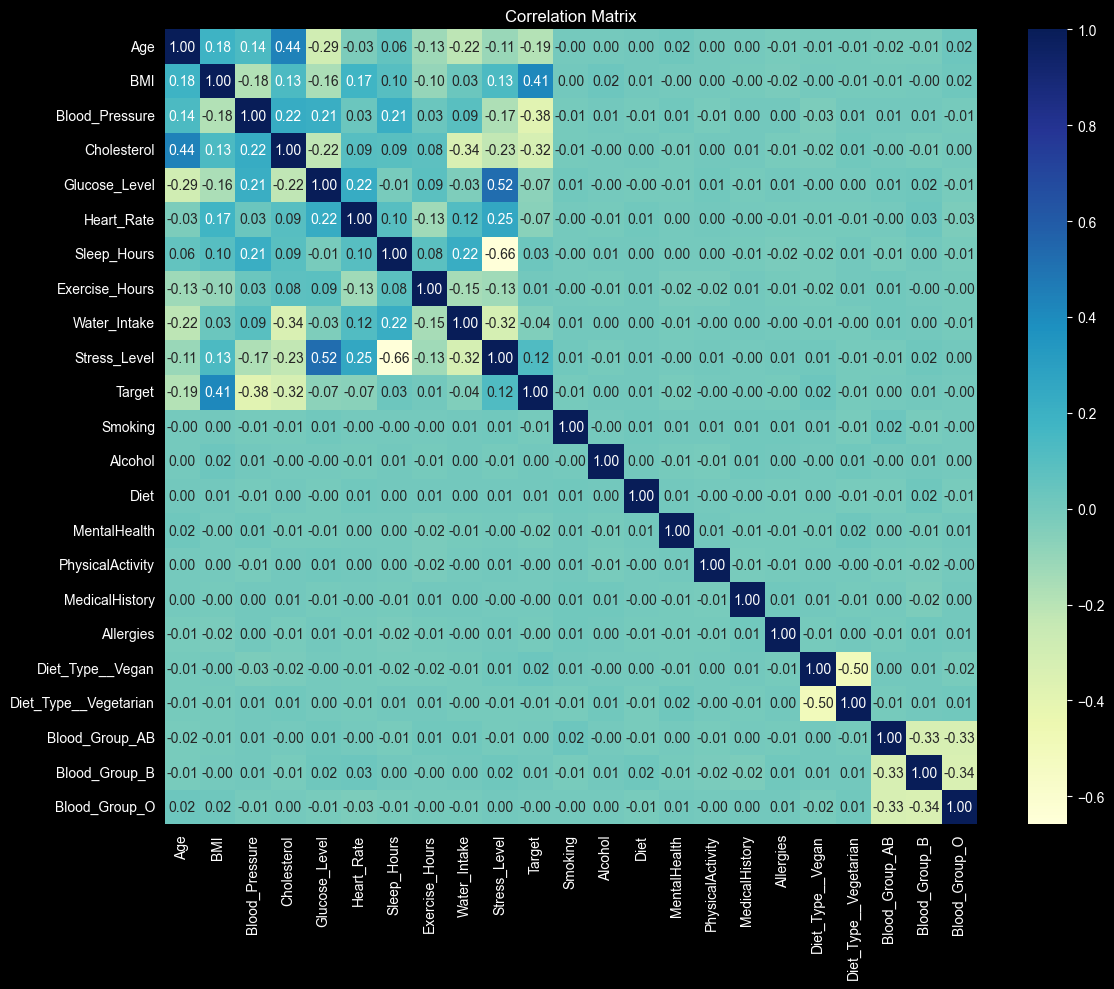

In [12]:
corr_matrix = df.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [14]:
 corr_taget = df.corr()[["Target"]].sort_values(by=["Target"], ascending=False)

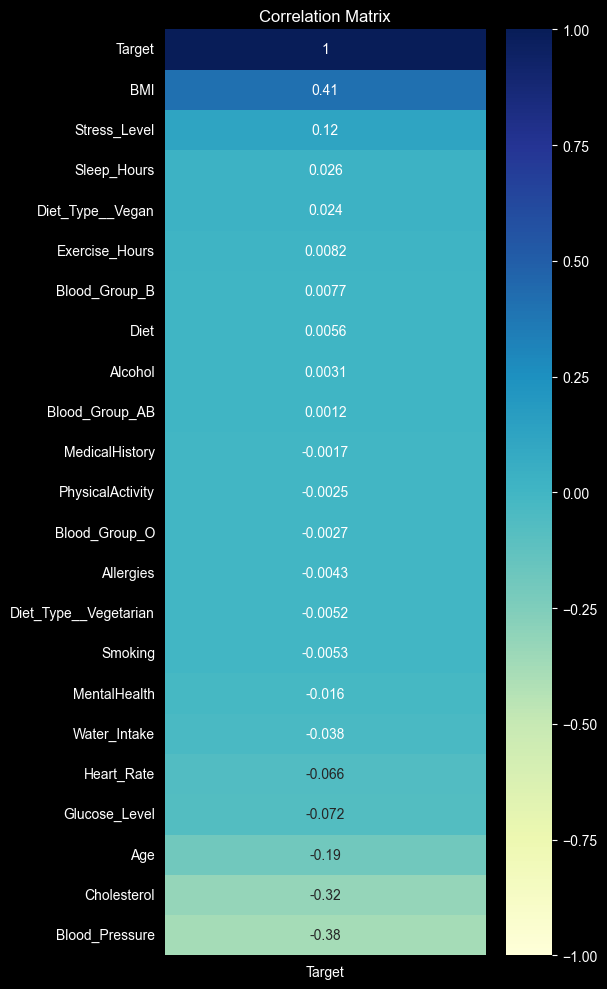

In [15]:
plt.figure(figsize=(6,10))
sns.heatmap(corr_taget, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

This is a synthetically generated data and the common intuition doesn't match the result so we will drop features from sleep_hours to glucose_level because they have very low or no co-relation

In [16]:
correlations = df.corr()['Target'].abs()

threshold = 0.1
selected_features = correlations[correlations >= threshold].index.tolist()

df = df[selected_features]
df.shape

(9549, 6)

In [17]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Stress_Level,Target
0,2.0,26.0,111.0,198.0,5.0,1
1,8.0,24.0,121.0,199.0,9.0,1
2,81.0,27.0,147.0,203.0,1.0,0
3,25.0,21.0,150.0,199.0,3.0,0
4,24.0,26.0,146.0,202.0,1.0,0


### Train Test Split

In [19]:
X = df.drop(columns=["Target"])
y = df["Target"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Model Training

In [22]:
import xgboost as xgb

In [23]:
xgb_cls = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
)

In [24]:
xgb_cls.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [25]:
y_pred = xgb_cls.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.887434554973822

### Feature Engineering

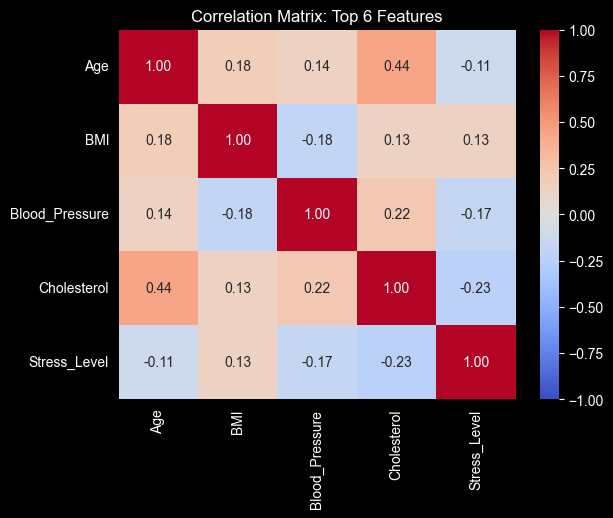

In [27]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Top 6 Features')
plt.show()

In [28]:
# 1. Age-Cholesterol Interaction (The "Long-term Exposure" effect)
# Intuition: High cholesterol is bad, but having it for a longer time (Age) is worse.
df['Age_x_Cholesterol'] = df['Age'] * df['Cholesterol']

# 2. BP-Cholesterol Interaction (The "Cardio-Stress" effect)
# Intuition: High pressure + Clogged arteries (Cholesterol) = Multiplied Risk
df['BP_x_Cholesterol'] = df['Blood_Pressure'] * df['Cholesterol']

# 3. Total Cardiovascular Load (Combining all three)
# Since Age, BP, and Cholesterol are all inter-linked, let's make one "Master Feature"
df['Cardio_Load'] = df['Age'] * df['Blood_Pressure'] * df['Cholesterol']

In [30]:
X1 = df.drop(columns = ["Target"])

In [31]:
X1.head()

,Age,BMI,Blood_Pressure,Cholesterol,Stress_Level,Age_x_Cholesterol,BP_x_Cholesterol,Cardio_Load
0,2.0,26.0,111.0,198.0,5.0,396.0,21978.0,43956.0
1,8.0,24.0,121.0,199.0,9.0,1592.0,24079.0,192632.0
2,81.0,27.0,147.0,203.0,1.0,16443.0,29841.0,2417121.0
3,25.0,21.0,150.0,199.0,3.0,4975.0,29850.0,746250.0
4,24.0,26.0,146.0,202.0,1.0,4848.0,29492.0,707808.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42
)

In [35]:
xgb_cls = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
)

xgb_cls.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [36]:
y_pred = xgb_cls.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.8900523560209425

### Hyper parameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],      # How many trees to build
    'learning_rate': [0.01, 0.05, 0.1],   # Step size (lower is more precise but slower)
    'max_depth': [3, 4, 5],               # Depth of each tree (keep low to prevent overfitting)
    'subsample': [0.8, 1.0]               # % of rows to use for each tree (0.8 adds randomness)
}
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest Accuracy found in Grid: {grid_search.best_score_:.4f}")
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best Accuracy found in Grid: 0.8920
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


C:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:200: UserWarning: [08:55:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 FINAL TEST ACCURACY: 0.8901
------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       900
           1       0.89      0.91      0.90      1010

    accuracy                           0.89      1910
   macro avg       0.89      0.89      0.89      1910
weighted avg       0.89      0.89      0.89      1910



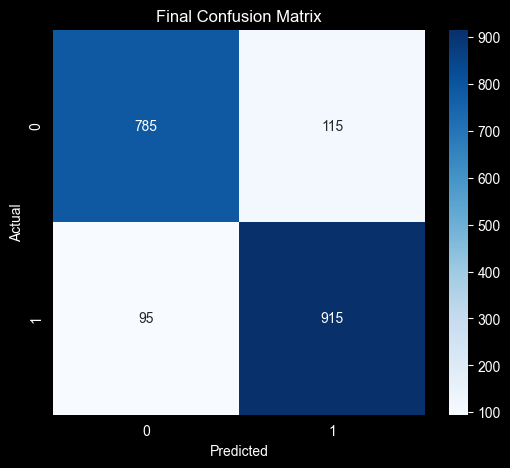

In [39]:
from sklearn.metrics import  confusion_matrix

# 1. Get the best model directly from the grid search
best_model = grid_search.best_estimator_

# 2. Predict on the Test Set (X_test)
y_pred_final = best_model.predict(X_test)

# 3. Calculate Final Scores
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f" FINAL TEST ACCURACY: {final_accuracy:.4f}")
print("-" * 30)
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# 4. Plot Confusion Matrix (Optional but recommended)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Blues')
plt.title('Final Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 🏥 Project Summary: NovaGen Health Risk Prediction

## 1. Problem Statement
The goal of this project was to build a predictive model for **NovaGen Research Labs** to classify individuals as **"Healthy"** or **"Unhealthy"** based on physiological and lifestyle data. The dataset contained **9,800 records** with features ranging from Age and BMI to lifestyle habits like Smoking and Alcohol consumption.

## 2. Data Analysis & Feature Selection
During the Exploratory Data Analysis (EDA) phase, we discovered a significant insight regarding the dataset structure:
* **Synthetic Noise:** Lifestyle features such as `Smoking`, `Alcohol`, `Diet`, and `Sleep_Hours` showed near-zero correlation with the Target variable (e.g., Alcohol correlation was `0.0031`). This strongly suggests these features were synthetic noise in this specific dataset.
* **Key Drivers:** The strongest predictors of health risk were metabolic indicators:
    * **BMI:** 0.41 (Strongest positive correlation)
    * **Blood Pressure:** -0.38
    * **Cholesterol:** -0.32
    * **Age:** -0.19

**Action:** We dropped the low-correlation "noise" features to prevent overfitting and focused the model on the high-signal metabolic features.

## 3. Model Selection & Optimization
We selected **XGBoost Classifier** for its ability to handle non-linear relationships and feature interactions.
* **Initial Performance:** The base model achieved ~88.7% accuracy.
* **Feature Engineering:** We tested interaction terms (e.g., `Age * Cholesterol`), which helped clarify risk factors for the model.
* **Hyperparameter Tuning:** Using `GridSearchCV`, we optimized the model to find the best balance between complexity and generalization.
    * **Best Parameters:** `learning_rate: 0.1`, `max_depth: 4`, `n_estimators: 200`, `subsample: 0.8`.


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

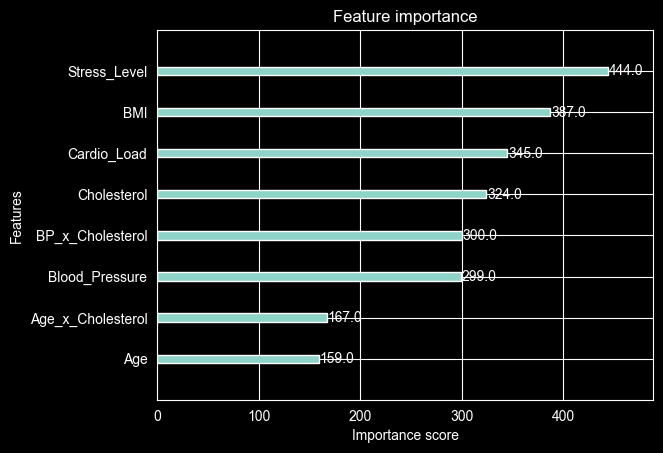

In [41]:
xgb.plot_importance(best_model)